In [1]:
import Pkg; Pkg.add("QuadGK")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %]  13.8 %============>                            ]  27.7 %]  41.4 % [=======================>                 ]  55.2 %68.9 %Fetching: [=============================>           ]  72.2 %>     ]  85.9 % [========================================>]  99.8 % Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
  [c91e804a] ~ Gadfly v1.0.0+ #master (https://github.com/GiovineItalia/Gadfly.jl) ⇒ v1.0.1+ #master (https://github.com/GiovineItalia/Gadfly.jl)
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [c91e804a] ~ Gadfly v1.0.0+ #master (https://github.com/GiovineItalia/Gadfly.jl) ⇒ v1.0.1+ #master (https://github.com/GiovineItalia/Gadfly.jl)


In [2]:
using QuadGK
using Polynomials

# Zadanie 1

In [3]:
function LegendrePolynomialsGenerator(k)
    P0(x) = 1
    P1(x) = x
    
    if k == 0
        return P0
    elseif k == 1 
        return P1
    else
        Pk(x) = (2*k-1)/(k)*x*LegendrePolynomialsGenerator(k-1)(x) - (k-1)/(k)*LegendrePolynomialsGenerator(k-2)(x) 
        return Pk
    end
end

LegendrePolynomialsGenerator (generic function with 1 method)

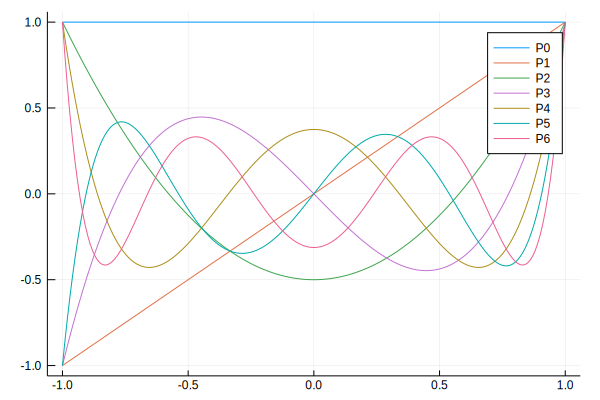

In [4]:
x = -1:0.01:1
using Plots
plot(x, LegendrePolynomialsGenerator(0), label = "P0")
plot!(x, LegendrePolynomialsGenerator(1), label = "P1")
plot!(x, LegendrePolynomialsGenerator(2), label = "P2")
plot!(x, LegendrePolynomialsGenerator(3), label = "P3")
plot!(x, LegendrePolynomialsGenerator(4), label = "P4")
plot!(x, LegendrePolynomialsGenerator(5), label = "P5")
plot!(x, LegendrePolynomialsGenerator(6), label = "P6")

In [5]:
(xp,a) = gauss(Float64,2)
xp

2-element Array{Float64,1}:
 -0.5773502691896258
  0.5773502691896258

In [6]:
using Roots
find_zero(LegendrePolynomialsGenerator(2), 0.5)

0.5773502691896257

In [7]:
(xp,a) = gauss(Float64,3)
xp

3-element Array{Float64,1}:
 -0.7745966692414834
  0.0               
  0.7745966692414834

In [8]:
find_zero(LegendrePolynomialsGenerator(3), 0.5)

0.7745966692414834

In [9]:
(xp,a) = gauss(Float64,4)
xp

4-element Array{Float64,1}:
 -0.8611363115940526
 -0.3399810435848563
  0.3399810435848563
  0.8611363115940526

In [10]:
find_zero(LegendrePolynomialsGenerator(4), 0.5)

0.3399810435848563

In [11]:
find_zero(LegendrePolynomialsGenerator(4), 0.9)

0.8611363115940526

# Zadanie 2

In [12]:
function GaussQuadrature(k, f)
    (xp,a) = gauss(Float64, k)
    sum(a .* f.(xp))
end

GaussQuadrature (generic function with 1 method)

In [13]:
GaussQuadrature(1, x -> x)

0.0

In [14]:
GaussQuadrature(4, x -> x)

-5.551115123125783e-17

In [15]:
GaussQuadrature(4, x -> x^2)

0.666666666666667

In [16]:
GaussQuadrature(1, x -> x^2)

0.0

In [17]:
GaussQuadrature(2, x -> x^3)

0.0

In [18]:
GaussQuadrature(5, x -> x^3)

-2.7755575615628914e-17

In [19]:
GaussQuadrature(2, x -> x^4) # 2/5 = 0.4

0.2222222222222223

In [20]:
GaussQuadrature(3, x -> x^4)

0.4000000000000001

# Zadanie 3

In [21]:
function integrateGauss(k::Int64, (from, to), f::Function)
    g(x) = (to-from)/2 * x + (to + from)/2
    h(x) = f(g(x))
    return (to-from)/2 * GaussQuadrature(k, h)
end

integrateGauss (generic function with 1 method)

In [22]:
integrateGauss(2, (-1, 1), x -> x^3) # 0

0.0

In [29]:
integrateGauss(2, (-1, 1), x -> x^2) # 2/3

0.6666666666666667

In [32]:
integrateGauss(2, (-1, 1), x -> x^4) #0.4

0.2222222222222223

In [33]:
integrateGauss(3, (-1, 1), x -> x^4) #0.4

0.4000000000000001

# Zadanie 4

In [23]:
quadgk(x -> x^2, -1, 1)

(0.6666666666666667, 2.220446049250313e-16)

In [24]:
quadgk(x -> x^3, -4, 4)

(-7.105427357601002e-15, 0.0)

In [25]:
quadgk(x -> x^3, -Inf, Inf)

DomainError: DomainError with -0.9999999999999964:
integrand produced Inf in the interval (-1.0, -0.9999999999999929)

In [26]:
quadgk(x -> 1/sqrt(2*pi)*exp(-x^2)/2, -Inf, Inf)

(0.35355339059327345, 1.282526912587183e-9)

# Zadanie 5

In [27]:
function integrateTrapezium(f, (a, b), steps)
    h = (b-a)/steps
    h * sum((f(a+i*h) + f(a+i*h+h))/2.0 for i in 1:steps)
end

integrateTrapezium (generic function with 1 method)

In [45]:
integrateTrapezium(x -> x^2, (-1, 1), 1000)

0.6666760000000006

In [39]:
using DataFrames
function test_suite(range, f, from_to, ar)
    results = DataFrame(Partitions = Int64[], Error = Float64[])
    for i in range
        cr = integrateTrapezium(f, from_to, i)
        push!(results, [i, abs(ar - cr)])
    end
    results
end

test_suite (generic function with 1 method)

In [46]:
f(x) = 2*x^3-3*x^2+x+4
ar = 0
data = test_suite(100:100:10000, f, (-2,2), ar)

,Partitions,Error
,Int64,Float64
1,100,1.41837
2,200,0.714496
3,300,0.47754
4,400,0.358612
5,500,0.28711
6,600,0.239381
7,700,0.205259
8,800,0.179651
9,900,0.159725


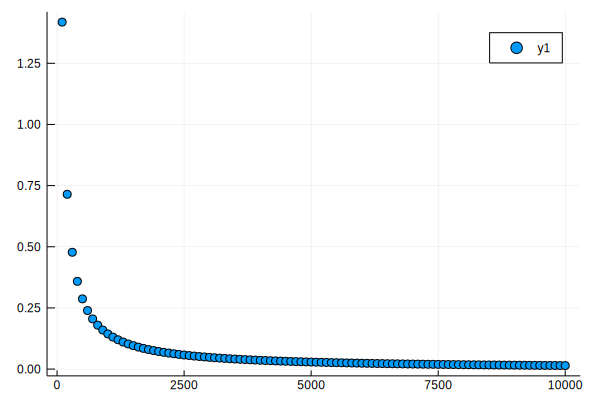

In [47]:
scatter(data[:Partitions], data[:Error])

In [48]:
integrateTrapezium(f, (-2,2), 10000)

0.014397760767966231